---
# <p style="font-family: 'italic', cursive; font-size: 36px; font-weight: bold; text-align: center; color: skyblue; background-color: #212529; padding: 10px 20px 10px 10px; border: 2px solid #343a40; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">Titanic Survival Prediction</p>
---

#### **CongoRise Internship Task |** **Titanic Survival Prediction**  
#### **Autor |** **Muhammad Abdullah Abrar**  
*IBM Certified Data Scientist*

I am thrilled to share with you my exciting journey into the world of data science! Over the past 1.5 years, I've been on a mission to learn and master the skills that can unlock the power of data. Let me give you a quick tour of the amazing topics I've had the privilege of diving into it:

- **LinkedIn:** [Muhammad Abdullah Abrar](https://www.linkedin.com/in/muhammadabdullahabrar/)
- **GitHub:** [Abdullah-0-3](https://github.com/Abdullah-0-3)
- **Kaggle:** [mabdullahabrar](https://www.kaggle.com/mabdullahabrar)

For any suggestions or collaborations, feel free to reach out to me at abdullahabrar4843@gmail.com.


<p style="text-align:center">
    <img src="https://maritime-executive.com/media/images/article/Photos/Vessels_Concepts/Titanic-II.197b1e.jpg" alt="Rasin Variety Classification">
</p>

---
# <p style="font-family: 'italic', cursive; font-size: 36px; font-weight: bold; text-align: center; color: skyblue; background-color: #212529; padding: 10px 20px 10px 10px; border: 2px solid #343a40; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">Dataset Information</p>
---

| | Details |
|---|---|
| **Dataset Name** | Titanic Survival Prediction |
| **Source** | [Kaggle Titianic Prediction]() |
| **Language** | Python |
| **Task** | Classification |
| **Instances** | 418 |
| **Features** | 12 |

In [1]:
# importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
# importing dataset
df = pd.read_csv('Titanic Survial Prediction.csv')

# displaying few rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
# dataset description
df.describe().T


,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Survived,418.0,0.363636,0.481622,0.00,0.0000,0.0000,1.00,1.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [4]:
# checking datatype
df.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
# shape of dataset
print('Shape of Dataset', df.shape)
print('Rows of Dataset', df.shape[0])
print('Columns of Dataset', df.shape[1])


Shape of Dataset (418, 12)
Rows of Dataset 418
Columns of Dataset 12


---
# <p style="font-family: 'italic', cursive; font-size: 36px; font-weight: bold; text-align: center; color: skyblue; background-color: #212529; padding: 10px 20px 10px 10px; border: 2px solid #343a40; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">Data Preprocessing & Visualization</p>
---

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


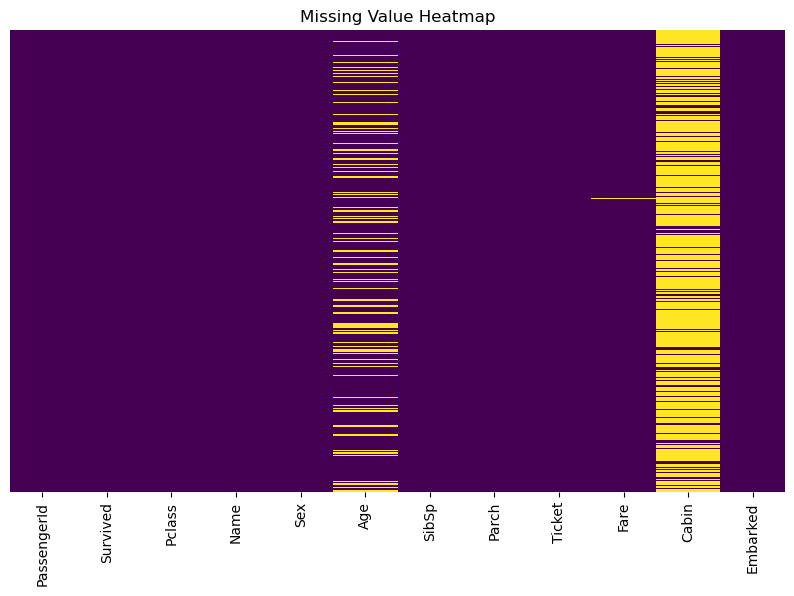

In [6]:
# null values ploting
print(df.isnull().sum())
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()


In [7]:
# filling age and fare with mean
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())


In [8]:
Embarked = df['Embarked'].unique()
for Embarkeds in Embarked:
    print(Embarkeds)


Q
S
C


In [9]:
# filling in categorical values
df['Embarked'] = df['Embarked'].map( {'Q': 0,'S':1,'C':2}).astype(int)
df['Sex'] = df['Sex'].map( {'female': 1,'male':0}).astype(int)


In [10]:
df['Age'] = df['Age'].astype(int)
df['Fare'] = df['Fare'].astype(int)
data = df.drop(['PassengerId','Name','Cabin','Ticket'], axis =1, inplace=True)
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34,0,0,7,0
1,1,3,1,47,1,0,7,1
2,0,2,0,62,0,0,9,0
3,0,3,0,27,0,0,8,1
4,1,3,1,22,1,1,12,1


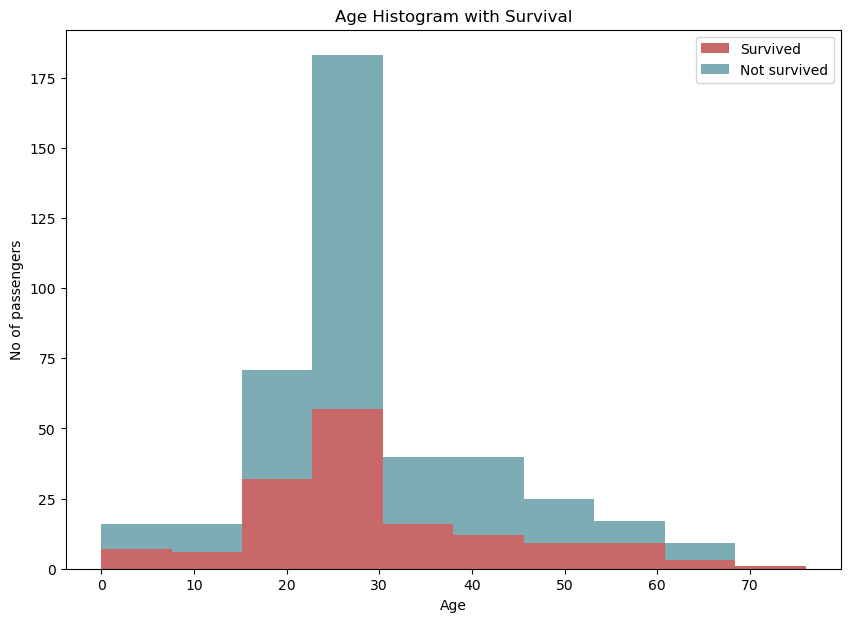

In [11]:
fig = plt.figure(figsize =(10, 7))
plt.hist(x = [df[df['Survived']==1]['Age'], df[df['Survived']==0]['Age']],stacked=True, color = ['#C96868','#7EACB5'],label = ['Survived','Not survived'])
plt.title('Age Histogram with Survival')
plt.xlabel('Age')
plt.ylabel('No of passengers')
plt.legend()


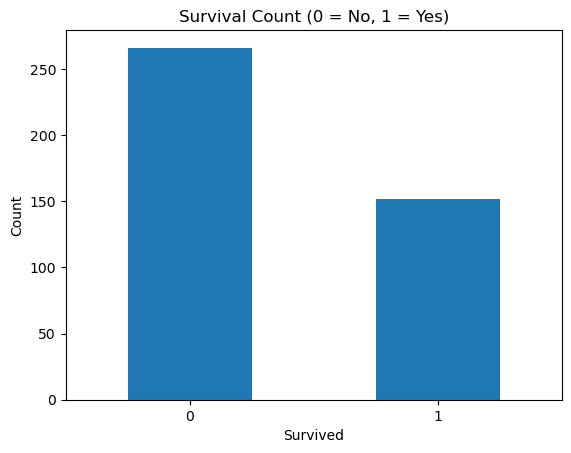

In [12]:
column = 'Survived'

# Create a bar chart
survival_counts = df[column].value_counts()
survival_counts.plot(kind='bar', rot=0)

# Adding labels and title
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count (0 = No, 1 = Yes)')

# Show the plot
plt.show()


---
# <p style="font-family: 'italic', cursive; font-size: 36px; font-weight: bold; text-align: center; color: skyblue; background-color: #212529; padding: 10px 20px 10px 10px; border: 2px solid #343a40; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">Training - Testing - Splitting</p>
---

In [13]:
# dividing into feature and target

Train = df.drop(['Survived'], axis=1)
Test = df.iloc[:,1]

# training testing and spliting
x_train, x_test, y_train, y_test = train_test_split(Train, Test, test_size = 0.2, random_state = 1)

# stats of splitted data
print('Shape of X Train:', x_train.shape)
print('Shape of Y Train:', y_train.shape)
print('Shape of X Test:', x_test.shape)
print('Shape of X Test:', x_test.shape)


Shape of X Train: (334, 7)
Shape of Y Train: (334,)
Shape of X Test: (84, 7)
Shape of X Test: (84, 7)


---
# <p style="font-family: 'italic', cursive; font-size: 36px; font-weight: bold; text-align: center; color: skyblue; background-color: #212529; padding: 10px 20px 10px 10px; border: 2px solid #343a40; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">Model Selection & Evaluation</p>
---

In [14]:
LR = LogisticRegression(solver='liblinear', max_iter=200)
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
LRAcc = accuracy_score(y_pred,y_test)
print('--------------------------------------')
print('Logistic regression accuracy: {:.2f}%'.format(LRAcc*100))
print('--------------------------------------')
print(classification_report(y_true=y_test, y_pred=y_pred))
print('--------------------------------------')
print(confusion_matrix(y_true=y_test, y_pred=y_pred))


--------------------------------------
Logistic regression accuracy: 92.86%
--------------------------------------
              precision    recall  f1-score   support

           1       0.94      1.00      0.97        16
           2       1.00      0.74      0.85        23
           3       0.90      1.00      0.95        45

    accuracy                           0.93        84
   macro avg       0.95      0.91      0.92        84
weighted avg       0.94      0.93      0.92        84

--------------------------------------
[[16  0  0]
 [ 1 17  5]
 [ 0  0 45]]


In [15]:
RFC = RandomForestClassifier(n_estimators=30, max_depth=2)
RFC.fit(x_train, y_train)
y_pred = RFC.predict(x_test)
RFCcc = accuracy_score(y_test, y_pred)
print('--------------------------------------')
print('Random Forest Classifier Accuracy: {:.2f}%'.format(100*RFCcc))
print('--------------------------------------')
print(classification_report(y_test, y_pred))
print('--------------------------------------')
print(confusion_matrix(y_test, y_pred))


--------------------------------------
Random Forest Classifier Accuracy: 96.43%
--------------------------------------
              precision    recall  f1-score   support

           1       0.84      1.00      0.91        16
           2       1.00      0.87      0.93        23
           3       1.00      1.00      1.00        45

    accuracy                           0.96        84
   macro avg       0.95      0.96      0.95        84
weighted avg       0.97      0.96      0.96        84

--------------------------------------
[[16  0  0]
 [ 3 20  0]
 [ 0  0 45]]


In [16]:
DTC = DecisionTreeClassifier(max_depth=2, criterion='entropy')
DTC.fit(x_train, y_train)
y_pred_dtc = DTC.predict(x_test)
DTCcc = accuracy_score(y_test, y_pred_dtc)
print('--------------------------------------')
print('Random Forest Classifier Accuracy: {:.2f}%'.format(100*DTCcc))
print('--------------------------------------')
print(classification_report(y_test, y_pred_dtc))
print('--------------------------------------')
print(confusion_matrix(y_test, y_pred_dtc))


--------------------------------------
Random Forest Classifier Accuracy: 100.00%
--------------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        45

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

--------------------------------------
[[16  0  0]
 [ 0 23  0]
 [ 0  0 45]]


### **Random Forest Classifier & Decision Tree CLassifier Produced 100% Accuracy**

---
# <p style="font-family: 'italic', cursive; font-size: 36px; font-weight: bold; text-align: center; color: skyblue; background-color: #212529; padding: 10px 20px 10px 10px; border: 2px solid #343a40; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">Thhankks!!</p>
---

---